# Churn Prediction in Telecom Industry

### Importing the required libraries 

In [250]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Exploring the dataset

In [251]:
#read the dataset in csv format
df = pd.read_csv("Telco-Customer-Churn.csv")

In [252]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [253]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [254]:
# rows and columns of dataset

a = df.shape
print("The number of rows in the dataset is",a[0])
print("The number of columns in the dataset is",a[1])

The number of rows in the dataset is 7043
The number of columns in the dataset is 21


In [255]:
#index of dataset

print("Index : ",df.index)

Index :  RangeIndex(start=0, stop=7043, step=1)


In [256]:
#total number of elements in dataset

print("The size of the dataset is",df.size)

The size of the dataset is 147903


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [258]:
#detailed description of the dataset

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [259]:
#displaying all the attributes of the dataset

a = df.columns
print("The attributes of the dataset are :")
print(a)

The attributes of the dataset are :
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [260]:
df.columns = df.columns.str.lower()
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [261]:
df.isnull()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [262]:
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [263]:
df = df.drop(['customerid'],axis=1)

In [264]:
df.agg(
    {
        "tenure": ["min", "max", "median"],
        "monthlycharges":["min", "max", "median"] ,
        
    }
)

,tenure,monthlycharges
min,0.0,18.25
max,72.0,118.75
median,29.0,70.35


In [265]:
fg = px.pie(df, names='churn', title='Churn')
fg.update_traces(rotation=90,pull=[0.1], textinfo='percent+label')
fg.show()

In [266]:
fg = px.pie(df, names='seniorcitizen', title='Churn')
fg.update_traces(rotation=90,pull=[0.1], textinfo='percent+label')
fg.show()

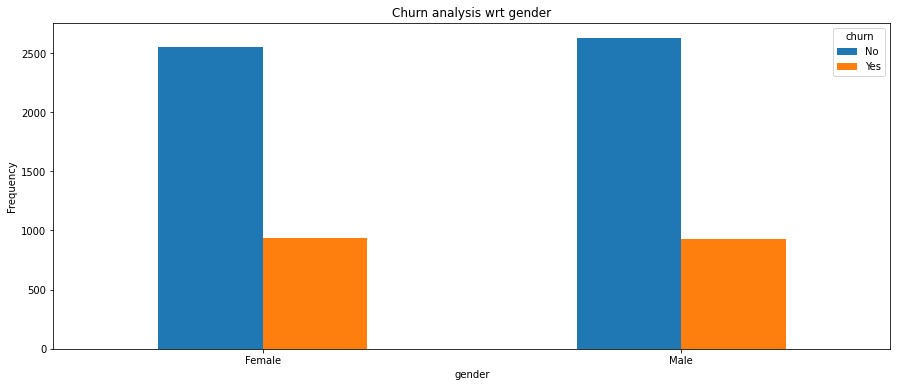

In [267]:
pd.crosstab(df.gender,df.churn).plot(kind="bar",figsize=(15,6))
plt.title('Churn analysis wrt gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'No of Customers by their tenure')

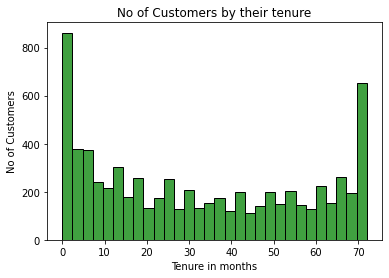

In [268]:
fg = sns.histplot(df['tenure'], 
             bins=30, color = 'green' )
fg.set_xlabel('Tenure in months')
fg.set_ylabel('No of Customers')
fg.set_title('No of Customers by their tenure')

In [269]:
#types of contract available 
df['contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

Text(0.5, 1.0, '# of Customers by Contract Type')

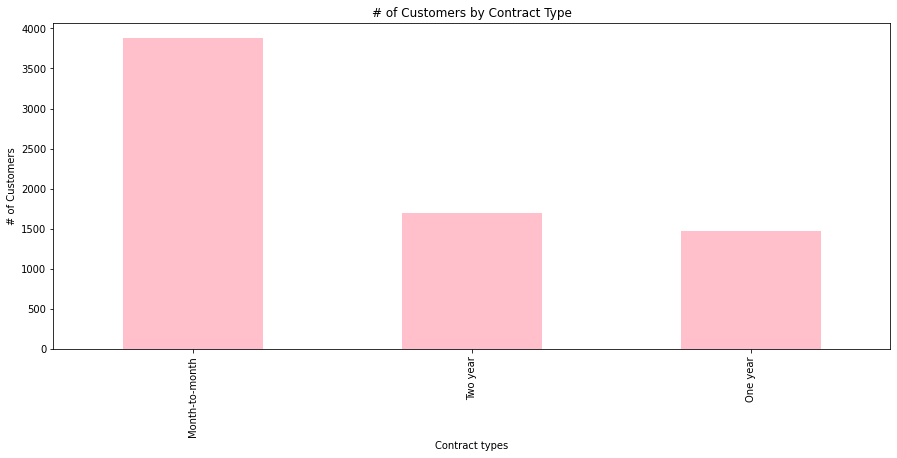

In [270]:
fg = df['contract'].value_counts().plot(kind = 'bar',figsize=(15,6),color='pink')
fg.set_xlabel('Contract types')
fg.set_ylabel('# of Customers')
fg.set_title('# of Customers by Contract Type')

Text(0.5, 1.0, 'Month-to-month contract analysis')

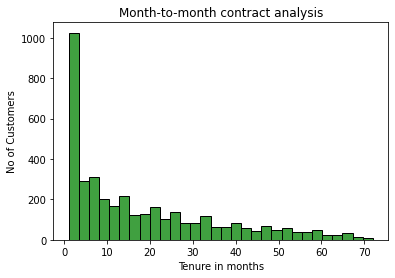

In [271]:
fg = sns.histplot(df[df['contract']=='Month-to-month']['tenure'], 
             bins=30, color = 'green' )
fg.set_xlabel('Tenure in months')
fg.set_ylabel('No of Customers')
fg.set_title('Month-to-month contract analysis')

Text(0.5, 1.0, 'One year contract analysis')

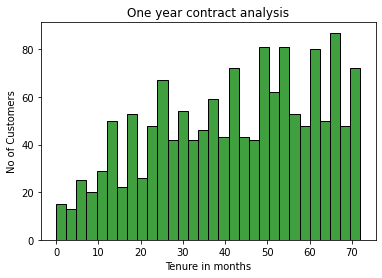

In [272]:
fg = sns.histplot(df[df['contract']=='One year']['tenure'], 
             bins=30, color = 'green' )
fg.set_xlabel('Tenure in months')
fg.set_ylabel('No of Customers')
fg.set_title('One year contract analysis')

Text(0.5, 1.0, 'Two year contract analysis')

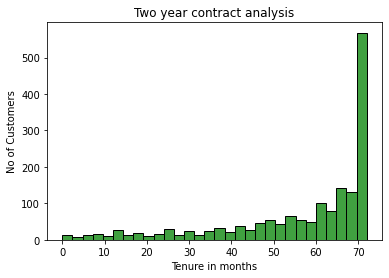

In [273]:
fg = sns.histplot(df[df['contract']=='Two year']['tenure'], 
             bins=30, color = 'green' )
fg.set_xlabel('Tenure in months')
fg.set_ylabel('No of Customers')
fg.set_title('Two year contract analysis')

In [274]:
fig = px.scatter(df, x="monthlycharges", y="totalcharges") 
fig.show()

In [275]:
a = ['partner','dependents','paperlessbilling','churn','phoneservice']

In [276]:
df1 = df.copy()

In [277]:
for i in a:
    if i == 'gender':
         df1[i] = df1[i].map({"Male":1,"Female":0})
    else:
        df1[i] = df1[i].map({"Yes":1,"No":0})

In [278]:
b = ['multiplelines','internetservice','onlinesecurity','onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies','contract','paperlessbilling','paymentmethod']

In [279]:
df1 = pd.get_dummies(df1,columns=b)

In [280]:
from sklearn.preprocessing import LabelEncoder
lec = LabelEncoder()

In [281]:
df2 = df1.copy()

for i in df1.columns:
    df2[i] = lec.fit_transform(df1[i])

In [282]:
df2

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,monthlycharges,totalcharges,churn,multiplelines_No,...,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_0,paperlessbilling_1,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,0,1,0,1,0,142,2505,0,0,...,0,1,0,0,0,1,0,0,1,0
1,1,0,0,0,34,1,498,1466,0,1,...,0,0,1,0,1,0,0,0,0,1
2,1,0,0,0,2,1,436,157,1,1,...,0,1,0,0,0,1,0,0,0,1
3,1,0,0,0,45,0,266,1400,0,0,...,0,0,1,0,1,0,1,0,0,0
4,0,0,0,0,2,1,729,925,1,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,991,1597,0,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,0,1,1,72,1,1340,5698,0,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,0,1,1,11,0,137,2994,0,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,1,1,0,4,1,795,2660,1,0,...,0,1,0,0,0,1,0,0,0,1


In [283]:
x = df2.drop('churn',axis=1)
x

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,monthlycharges,totalcharges,multiplelines_No,multiplelines_No phone service,...,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_0,paperlessbilling_1,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,0,1,0,1,0,142,2505,0,1,...,0,1,0,0,0,1,0,0,1,0
1,1,0,0,0,34,1,498,1466,1,0,...,0,0,1,0,1,0,0,0,0,1
2,1,0,0,0,2,1,436,157,1,0,...,0,1,0,0,0,1,0,0,0,1
3,1,0,0,0,45,0,266,1400,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,0,0,0,2,1,729,925,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,991,1597,0,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,0,1,1,72,1,1340,5698,0,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,0,1,1,11,0,137,2994,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,1,1,1,0,4,1,795,2660,0,0,...,0,1,0,0,0,1,0,0,0,1


In [284]:
y = df2['churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

In [285]:
from sklearn.model_selection import train_test_split

In [286]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [287]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5634, 41)
(5634,)
(1409, 41)
(1409,)


In [288]:
from sklearn.linear_model import LogisticRegression

In [289]:
model = LogisticRegression()

In [290]:
model.fit(x_train, y_train)

LogisticRegression()

In [291]:
prediction =  model.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [292]:
import sklearn.metrics as sm
accuracy = sm.accuracy_score(y_test,prediction)


In [293]:
accuracy

0.8112136266855926

In [294]:
from sklearn.metrics import confusion_matrix as cm
cmat = cm(y_test,prediction)
print(cmat)

[[961 100]
 [166 182]]


In [295]:
from sklearn.metrics import classification_report as cr
print(cr(y_test,prediction))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1061
           1       0.65      0.52      0.58       348

    accuracy                           0.81      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409

